<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_code_kata/blob/master/kaggle_titanic_data_processing_revised2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /root/.kaggle
!cp drive/MyDrive/kaggle/kaggle.json /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import numpy as np
import pandas as pd

In [4]:
train_df=pd.read_csv('train.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
def preprocess_data(input_df):
  input_df['Age']=input_df['Age'].fillna(input_df['Age'].mean())

  sex_dummies=pd.get_dummies(input_df['Sex'],prefix='sex')
  pclass_dummies=pd.get_dummies(input_df['Pclass'],prefix='pclass')
  embarked_dummies=pd.get_dummies(input_df['Embarked'],'embarked')

  input_df=input_df.drop(['PassengerId','Name','Ticket','Cabin','Age','Pclass','Embarked','Sex','SibSp','Parch'],axis=1)

  new_df=pd.concat([input_df,sex_dummies,pclass_dummies,embarked_dummies],axis=1)

  print(new_df.head())
  print(new_df.info())

  return new_df

In [9]:
new_train_df=preprocess_data(train_df)

   Survived     Fare  sex_female  ...  embarked_C  embarked_Q  embarked_S
0         0   7.2500           0  ...           0           0           1
1         1  71.2833           1  ...           1           0           0
2         1   7.9250           1  ...           0           0           1
3         1  53.1000           1  ...           0           0           1
4         0   8.0500           0  ...           0           0           1

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Fare        891 non-null    float64
 2   sex_female  891 non-null    uint8  
 3   sex_male    891 non-null    uint8  
 4   pclass_1    891 non-null    uint8  
 5   pclass_2    891 non-null    uint8  
 6   pclass_3    891 non-null    uint8  
 7   embarked_C  891 non-null    uint8  
 8   embarked_Q  8

In [10]:
def calc_vif(input_df):
  from statsmodels.stats.outliers_influence import variance_inflation_factor
  vif=pd.DataFrame()
  vif['VIF Factor']=[variance_inflation_factor(input_df.values,i) for i in range(input_df.shape[1])]
  vif['features']=input_df.columns

  print(vif)

In [11]:
calc_vif(new_train_df)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


   VIF Factor    features
0    1.596651    Survived
1    1.604902        Fare
2         inf  sex_female
3         inf    sex_male
4         inf    pclass_1
5         inf    pclass_2
6         inf    pclass_3
7   69.421171  embarked_C
8   36.634664  embarked_Q
9   90.698753  embarked_S


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [12]:
def solve_vif(input_df,delete_columns):
  new_df=input_df.drop(delete_columns,axis=1)
  print(new_df.info())
  return new_df

In [13]:
delete_columns=['sex_male','pclass_1','pclass_2','embarked_Q']
new_train_df=solve_vif(new_train_df,delete_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Fare        891 non-null    float64
 2   sex_female  891 non-null    uint8  
 3   pclass_3    891 non-null    uint8  
 4   embarked_C  891 non-null    uint8  
 5   embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(1), uint8(4)
memory usage: 17.5 KB
None


In [14]:
calc_vif(new_train_df)

   VIF Factor    features
0    2.452933    Survived
1    1.761636        Fare
2    2.190711  sex_female
3    2.032694    pclass_3
4    1.700042  embarked_C
5    2.613220  embarked_S


In [15]:
def my_train_test_split(input_df,input_label_df=None,label_column=None,test_size=0.25,random_state=None,shuffle=False):
  from sklearn.model_selection import train_test_split

  if input_label_df:
    label_df=input_label_df

  if label_column:
    label_df=input_df[label_column]
    input_df=input_df.drop([label_column],axis=1)

  X_train,X_test,y_train,y_test=train_test_split(input_df,label_df,test_size=test_size,random_state=random_state,shuffle=shuffle)

  train_df=pd.concat([X_train,y_train],axis=1)
  test_df=pd.concat([X_test,y_test],axis=1)

  print('Train data size:',train_df.shape)
  print('Test data size:',test_df.shape)
  return (train_df,test_df)

In [16]:
train_df,test_df=my_train_test_split(new_train_df,label_column='Survived')

Train data size: (668, 6)
Test data size: (223, 6)


In [17]:
def my_standardscaler(input_df,scaler,mode,label_column=None):

  if label_column:
    label_df=input_df[label_column]
    input_df=input_df.drop([label_column],axis=1)


  if mode=='FT':
    new_df=pd.DataFrame(scaler.fit_transform(input_df),columns=input_df.columns)
  elif mode=='T':
    new_df=pd.DataFrame(scaler.transform(input_df),columns=input_df.columns)
  else:
    print('Please select mode:FT(fit_transform) or T(transform).')



  if label_column:
    new_df=pd.concat([new_df.reset_index(drop=True),label_df.reset_index(drop=True)],axis=1)


  print('Data size:',new_df.shape)
  print(new_df.head())
  print(new_df.info())
  print(new_df.describe())
  return new_df

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
scaled_train_df=my_standardscaler(train_df,scaler,'FT',label_column='Survived')

Data size: (668, 6)
       Fare  sex_female  pclass_3  embarked_C  embarked_S  Survived
0 -0.538655   -0.756151  0.900166   -0.486864    0.630468         0
1  0.887760    1.322487 -1.110907    2.053960   -1.586124         1
2 -0.523619    1.322487  0.900166   -0.486864    0.630468         1
3  0.482706    1.322487 -1.110907   -0.486864    0.630468         1
4 -0.520834   -0.756151  0.900166   -0.486864    0.630468         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fare        668 non-null    float64
 1   sex_female  668 non-null    float64
 2   pclass_3    668 non-null    float64
 3   embarked_C  668 non-null    float64
 4   embarked_S  668 non-null    float64
 5   Survived    668 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 31.4 KB
None
               Fare    sex_female  ...    embarked_S    Survived
count  6.680000e+02

In [20]:
scaled_test_df=my_standardscaler(test_df,scaler,'T',label_column='Survived')

Data size: (223, 6)
       Fare  sex_female  pclass_3  embarked_C  embarked_S  Survived
0 -0.520834   -0.756151  0.900166   -0.486864    0.630468         0
1  0.458202    1.322487 -1.110907   -0.486864    0.630468         1
2  0.168612    1.322487 -1.110907   -0.486864    0.630468         1
3  0.458202   -0.756151 -1.110907   -0.486864    0.630468         0
4 -0.466257   -0.756151 -1.110907   -0.486864    0.630468         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fare        223 non-null    float64
 1   sex_female  223 non-null    float64
 2   pclass_3    223 non-null    float64
 3   embarked_C  223 non-null    float64
 4   embarked_S  223 non-null    float64
 5   Survived    223 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.6 KB
None
             Fare  sex_female    pclass_3  embarked_C  embarked_S    Survived
count 

In [21]:
import seaborn as sns

In [22]:
scaled_df_all=pd.concat([scaled_train_df,scaled_test_df],axis=0)

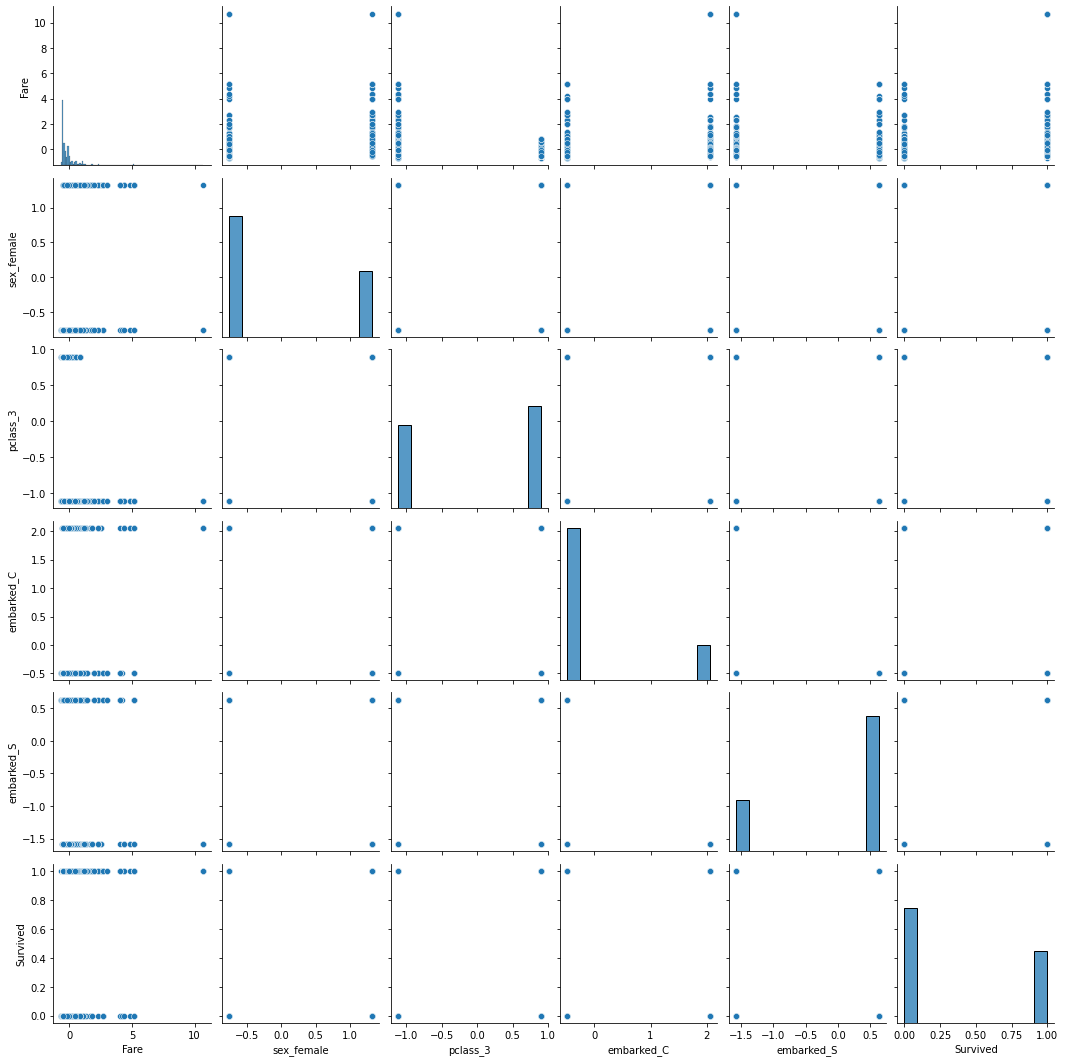

In [23]:
sns.pairplot(scaled_df_all)

In [24]:
corr_df=pd.DataFrame(scaled_df_all.corr()['Survived'])

In [25]:
corr_df

,Survived
Fare,0.257307
sex_female,0.543351
pclass_3,-0.322308
embarked_C,0.168240
embarked_S,-0.155660
Survived,1.000000


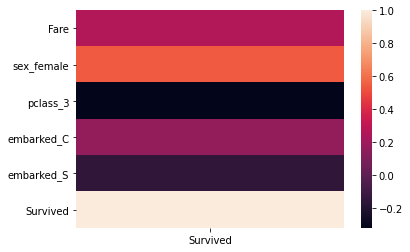

In [26]:
sns.heatmap(corr_df)